In [1]:
import json

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_origin = 'states.json'

with open(data_origin) as json_file:
    data = json.load(json_file)
    states = data['states']
    alphabet = data['alphabet']

In [5]:
s = pd.Series(states).str.lower()
pd.Series(states)

0                    Acre
1                 Alagoas
2                   Amapa
3                Amazonas
4                   Bahia
5                   Ceara
6        Distrito Federal
7          Espirito Santo
8                   Goias
9                Maranhao
10            Mato Grosso
11     Mato Grosso do Sul
12           Minas Gerais
13                   Para
14                Paraiba
15                 Parana
16             Pernambuco
17                  Piaui
18         Rio de Janeiro
19    Rio Grande do Norte
20      Rio Grande do Sul
21               Rondonia
22                Roraima
23         Santa Catarina
24              São Paulo
25                Sergipe
26              Tocantins
dtype: object

In [6]:
s.index

RangeIndex(start=0, stop=27, step=1)

In [7]:
s.head()

0        acre
1     alagoas
2       amapa
3    amazonas
4       bahia
dtype: object

In [8]:
s.to_frame()

,0
0,acre
1,alagoas
2,amapa
3,amazonas
4,bahia
5,ceara
6,distrito federal
7,espirito santo
8,goias
9,maranhao


In [9]:
df = s.to_frame()

In [10]:
df.head()

,0
0,acre
1,alagoas
2,amapa
3,amazonas
4,bahia


In [11]:
df.index

RangeIndex(start=0, stop=27, step=1)

In [12]:
df.columns = ['estados']
df.head()

,estados
0,acre
1,alagoas
2,amapa
3,amazonas
4,bahia


In [13]:
df2 = df.copy()

In [14]:
df2.index

RangeIndex(start=0, stop=27, step=1)

Ignora acentuação
.to_frame() para retornar um datafrase, sem essa função é retornada uma serie de valores.

In [19]:
df2['estados'][2]

'amapa'

In [31]:
for l in alphabet:
    df2[l] = s.str.count(l)

In [32]:
pd.set_option('display.max_columns', len(alphabet)+1)

In [33]:
df2

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
0,acre,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,4
1,alagoas,3,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,7
2,amapa,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,5
3,amazonas,3,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,8
4,bahia,2,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,5
5,ceara,2,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,5
6,distrito federal,1,0,0,2,2,1,0,0,2,0,0,1,...,0,1,0,0,2,1,0,0,0,0,0,0,13
7,espirito santo,1,0,0,0,1,0,0,0,2,0,0,0,...,1,2,1,0,1,2,0,0,0,0,0,0,11
8,goias,1,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,5
9,maranhao,3,0,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,8


In [23]:
df2['letter_count'] = df2.sum(axis=1)

In [24]:
df2.head()

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
0,acre,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,4
1,alagoas,3,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,7
2,amapa,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,5
3,amazonas,3,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,8
4,bahia,2,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,5


In [25]:
df2.sort_values(by='letter_count', ascending=False)

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
19,rio grande do norte,1,0,0,2,2,0,1,0,1,0,0,0,...,2,3,0,0,3,0,0,0,0,0,0,0,15
20,rio grande do sul,1,0,0,2,1,0,1,0,1,0,0,1,...,1,2,0,0,2,1,1,0,0,0,0,0,14
11,mato grosso do sul,1,0,0,1,0,0,1,0,0,0,0,1,...,0,4,0,0,1,3,1,0,0,0,0,0,14
6,distrito federal,1,0,0,2,2,1,0,0,2,0,0,1,...,0,1,0,0,2,1,0,0,0,0,0,0,13
18,rio de janeiro,1,0,0,1,2,0,0,0,2,1,0,0,...,1,2,0,0,2,0,0,0,0,0,0,0,12
12,minas gerais,2,0,0,0,1,0,1,0,2,0,0,0,...,1,0,0,0,1,2,0,0,0,0,0,0,11
23,santa catarina,5,0,1,0,0,0,0,0,1,0,0,0,...,2,0,0,0,1,1,0,0,0,0,0,0,11
7,espirito santo,1,0,0,0,1,0,0,0,2,0,0,0,...,1,2,1,0,1,2,0,0,0,0,0,0,11
16,pernambuco,1,1,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,0,0,0,0,0,10
10,mato grosso,1,0,0,0,0,0,1,0,0,0,0,0,...,0,3,0,0,1,2,0,0,0,0,0,0,9


In [37]:
df2.append(pd.Series(df2.sum(),name='Total'))

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
0,acre,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,4
1,alagoas,3,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,7
2,amapa,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,5
3,amazonas,3,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,8
4,bahia,2,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,5
5,ceara,2,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,5
6,distrito federal,1,0,0,2,2,1,0,0,2,0,0,1,...,0,1,0,0,2,1,0,0,0,0,0,0,13
7,espirito santo,1,0,0,0,1,0,0,0,2,0,0,0,...,1,2,1,0,1,2,0,0,0,0,0,0,11
8,goias,1,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,5
9,maranhao,3,0,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,8


In [27]:
df_plot = df2

In [28]:
df_plot = df_plot.drop(columns=['letter_count'])

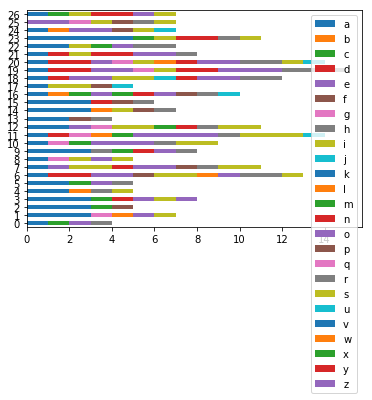

In [29]:
df_plot.plot(kind='barh', stacked=True);

In [30]:
print(len("rio grande do norte")-3)

16
